# Простые комбинаторные критерий и ошибки 1/2 рода 

## Критерий Фишера

Лаба нанимает людей. Есть ли дискриманация на рыке? 

|       |муж.    |жен.     |сумма |
|-------|--------|---------|------|
|наняли | $7$    | $1$     | $8$  | 
|нет    | $1$    | $11$    | $12$ |
|сумма  | $8$    | $12$    | $20$ |

$H_0:$ дискриминации на рынке нет 

$H_1:$ дискриминация на рынке есть

__Какова вероятность того, что мы получим именно такую выборку, если дискриминации нет?__



$$
\mathbb{P}(W=1, M=7) = \frac{C_{12}^1 \cdot C_8^7 }{C_{20}^8}
$$

In [1]:
from math import factorial 

def bin_coef(k,n):
    return factorial(n)/(factorial(k) * factorial(n-k))

def prob_gipGeom(W, M, Wn=12, Mn=8):
    return bin_coef(W, Wn) * bin_coef(M, Mn)/bin_coef(W + M, Wn + Mn)

prob_gipGeom(1, 7)

0.0007620862110026197

__P-значение__ - вероятность того, что произошел наш кейс либо еще более плохой при верности нулевой гипотезы. 

In [2]:
probability = prob_gipGeom(0, 7) + prob_gipGeom(1, 7)
probability

0.0008652853854092244

Нам надо выбрать какой-то порог, с которым мы будем сранивать P-значение. Если оно оказывается меньше этого порога, то мы не верим в нулевую гипотезу. Этот порог для сравнения называется $\alpha$ __уровнем значимости.__

In [18]:
x = list(range(9))
p = [prob_gipGeom(k, 8 - k) for k in x]
p

[7.938398031277288e-06,
 0.0007620862110026197,
 0.01467015956180043,
 0.09780106374533619,
 0.27506549178375805,
 0.35208382948321026,
 0.205382233865206,
 0.050297689926172895,
 0.003929507025482257]

In [19]:
sum(p)

0.9999999999999999

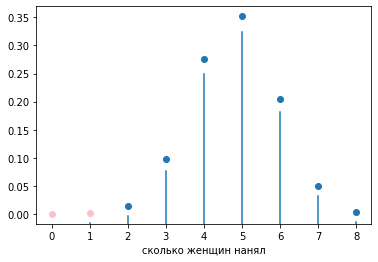

In [25]:
import matplotlib.pyplot as plt

for i,pp in enumerate(p):
    plt.axvline(i, 0, 2.5*pp)

plt.xlabel('сколько женщин нанял')
plt.scatter(x[:2], p[:2], color='pink');
plt.scatter(x[2:], p[2:]);

$T$ -- сколько девушек я нанял на работу (статистика для принятия решения) 

- Мы проводим опыт и находим наблюдаемое значение статистики 
- Мы сравниваем её с критическим
- Принимаем решение

## Критерий знаков


Мэр говорит Варламову: "У нас в городе больше половины квартир дешевле одного миллиона рублей!"

Врёт ли мэр? 

$H_0:$ мэр честный человек и не врёт

$H_1:$ мэр лжец и сволочь

- С помощью какой статистики мы могли бы проверить эту гипотезу? 
- Как в рамках выбронной модели формализовать проверку? 
- Как собрать выборку?
- Чему равно pvalue, критическое значение и тп? 

**Идеи:** 

- Надо смотреть на медианную цену! -- бутсрэп

$H_0: med < 1$

$H_1: med \ge 1$

- Надо смотортеь на выборочное среднее цен на квартиры! -- ЦПТ 

$H_0: \mu < 1$

$H_1: \mu \ge 1$


- Посчитать сколько цен оказались выше миллиона, сколько ниже миллиона -- Биномиальное распределение

$H_0: \mathbb{P}(X < 1) = 0.5$

$H_1:\mathbb{P}(X < 1) < 0.5$


$10$ квартир, одна из них оказалась дороже, 9 дешевле. 

В начале эксперимента мы установили уровень значимости в $\alpha = 0.01$

При верности нулевой гипотезы $T \sim Bin(10, 0.5)$ -- число квартир дешевле 1 миллиона

$\mathbb{P}(T = k) = C_n^k \cdot p^k \cdot (1-p)^{n-k}$

$T_{obs}$ = 9

$probability = \mathbb{P}(T \le T_{obs} \mid H_0)$

$T_{cr}: \mathbb{P}(T \le T_{cr} \mid H_0) = \alpha$

Выводы - ? 

In [27]:
def bin_prob(k, n=10, p=0.5):
    return bin_coef(k,n) * p**k * (1 - p)**(n-k)

bin_prob(9)

0.009765625

In [30]:
probability = sum([bin_prob(item) for item in range(10)])
probability

0.9990234375

In [35]:
for k in range(1, 12):
    a = sum([bin_prob(item) for item in range(k)])
    print(k - 1, a,  a > 0.01)

0 0.0009765625 False
1 0.0107421875 True
2 0.0546875 True
3 0.171875 True
4 0.376953125 True
5 0.623046875 True
6 0.828125 True
7 0.9453125 True
8 0.9892578125 True
9 0.9990234375 True
10 1.0 True


$T_{cr}$ будет между 0 и 1. Давайте просто возьмём $0.5$. С ним формально можно сравниться. Так-то понятное дело, что случайная величина дискретная. 

Можно сказать, что $T_{cr} = 1$ и отвергать нулевую гипотезу, если $T_{obs} <  T_{cr}$

## Ошибка второго рода


__Упражнение 1__ 

Николай Коперник и у него есть бутерброды. 

$$
X_1, \ldots, X_n \sim Bern(p)
$$

Правда ли, что бутерброд всегда падает маслом вниз? Если в испытании $i$ бутерброд упал маслом вниз, я записываю $X_i = 1$.

$$
H_0: p = 1 
$$

$$
H_1: p < 1
$$





__Критерий:__

Отвергаю гипотезу $H_0$, если $\sum_{i=1}^n X_i <n$

- $T_{obs} = S$
- $T_{cr} = n$

$$
\alpha = \mathbb{P}(H_1 \mid H_0) = \mathbb{P} \left( \sum_{i=1}^n X_i < n \mid p = 1 \right) = \mathbb{P} \left( \text{Хотябы один ноль} \mid p = 1 \right) = 0
$$

$$
\beta = \mathbb{P}(H_0 \mid H_1) = \mathbb{P}(H_0 \mid p < 1) = \mathbb{P} \left( \sum_{i=1}^n X_i = n \mid p < 1 \right) =p^n
$$

__Мощность критерия__ = $1 - \beta$

__Состоятельность критерия:__ $\beta \to 0$ при $n \to \infty$




__Упражнение 2__

Мы пронаблюдали наблюдение $X_1$. У нас есть гипотеза, что 

$H_0: X \sim U[0; 100]$ 

$H_1: X \sim U[50; 150]$

Критерий:  

- Если $X_1 < c,$ тогда выбираем $H_0.$ 

$\alpha(c), \beta(c)$ - ?

$$
\alpha = \mathbb{P}(H_1 \mid H_0) = \mathbb{P} \left(X_1 \ge c  \mid X_1 \sim U[0; 100] \right) = \frac{100 - c}{100}
$$

$$
\beta = \mathbb{P}(H_1 \mid H_0) = \mathbb{P} \left(X_1 < c  \mid X_1 \sim U[50; 150] \right) = \frac{c - 50}{150 - 50}
$$

$$
\beta = \frac{100 - 100 \cdot \alpha - 50}{100} = 0.5 - \alpha
$$

__Упражнение 3__

$H_0$ vs $H_1$ скорее всего 50/50 

$\alpha = 0.05, \beta = 0.2$






|            | $H_0$ правда     | $H_1$ правда    |
|------------|------------------|-----------------|
|взять $H_0$ | $0.95 \cdot 0.5$ | $0.2 \cdot 0.5$ | 
|взять $H_1$ | $0.05 \cdot 0.5$ | $0.2 \cdot 0.5$ |

In [36]:
0.95*0.5

0.475

In [37]:
0.05*0.5

0.025

|            | $H_0$ правда     | $H_1$ правда |
|------------|------------------|--------------|
|взять $H_0$ | $0.475$ | $0.1$          | 
|взять $H_1$ | $0.025$ | $0.4$         |

- $\alpha = 0.01$ - ?
- $\beta = 0.01$ - ?
- Априорно скорее всего $H_0$ неверна - ?